## Algerian Forest Fire EDA

Data imported from: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria. 122 instances for each region.

- The period from June 2012 to September 2012.
- The dataset includes 11 attribues and 1 output attribue (class)
- The 244 instances have been classified into `fire` (138 classes) and `not fire` (106 classes) classes.

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Algerian_forest_fires.csv", skiprows=1)

In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [13]:
#Skipping the initial or trailing whitespaces from each column
df.columns = df.columns.str.strip()

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

#### Bejaia Region Dataset 

In [15]:
df_b = df.iloc[:122,:]

In [16]:
# Label encoding
df_b['Region'] = 0

In [17]:
df_b

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0


#### Sidi-Bel Abbes Region Dataset

In [18]:
df_s = df.iloc[124:,:]

In [19]:
#Label encoding
df_s['Region'] = 1

In [20]:
df_s

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [21]:
# Row wise concatenation
df1 = pd.concat([df_b, df_s])

In [22]:
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [23]:
df1.shape

(244, 15)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [25]:
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [26]:
df1[164:167] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1


In [27]:
df1['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',
  

We can see that the `167th` index row has values misplaced and the value `'fire'` has shifted to `FWI` column. Similarly other values have shifted by 1 column to the left it seems. `DC` column has two values 14.6 and 9, we can shift this 9 which may belong to next column `ISI`.

In [37]:
df1['DC'].iloc[165] = 14.6
df1['ISI'].iloc[165] = 9
df1['BUI'].iloc[165] = 12.5
df1['FWI'].iloc[165] = 10.4
df1['Classes'].iloc[165] = 'fire'

In [38]:
df1[164:167] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire,1
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1


In [40]:
df1.isnull().sum().sum()

0

All the null values have been handled, now we can change the datatypes of columns

In [42]:
df1.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

In [44]:
df1[['day','month','year','Temperature','RH','Ws']] = df1[['day','month','year','Temperature','RH','Ws']].astype('int')

In [45]:
df1.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
Ws              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

In [46]:
for col in df.columns:
    if col != 'Classes' and df1[col].dtype == 'O':
        df1[col] = df1[col].astype('float')

In [47]:
df1.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [51]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


In [53]:
df1['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [54]:
# Cleaned Bejaia Region Dataset
df1[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,0
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0


In [55]:
# Cleaned Sidi-Bel Abbes Region Dataset
df1[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
125,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [56]:
df1.to_csv('Algerian forest fire_cleaned.csv', index=False)

### EDA

### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
**Weather data observations**

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws :Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8
**Fire Weather Index Components**

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely fire and not fire

In [3]:
df1 = pd.read_csv('Algerian forest fire_cleaned.csv')
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [63]:
df1[df1.columns[0]]

0       1
1       2
2       3
3       4
4       5
       ..
241    26
242    27
243    28
244    29
245    30
Name: day, Length: 244, dtype: int32

In [96]:
df1['Classes'].value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [4]:
df1['Classes'] = df1['Classes'].replace({'fire': 1, 'not fire': 0})

In [5]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df2 = df1.copy()

In [6]:
# Dropping year(constant) and classes(categorical) col as they are not required for univariate analysis.
df2 = df2.drop(['year','Classes'], axis=1)

In [12]:
df2

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plt.suptitle("Univariate Analysis", fontsize=30, fontweight = 'bold', alpha=0.8, y=1.)
plotnumber = 1

for column in df2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df2[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

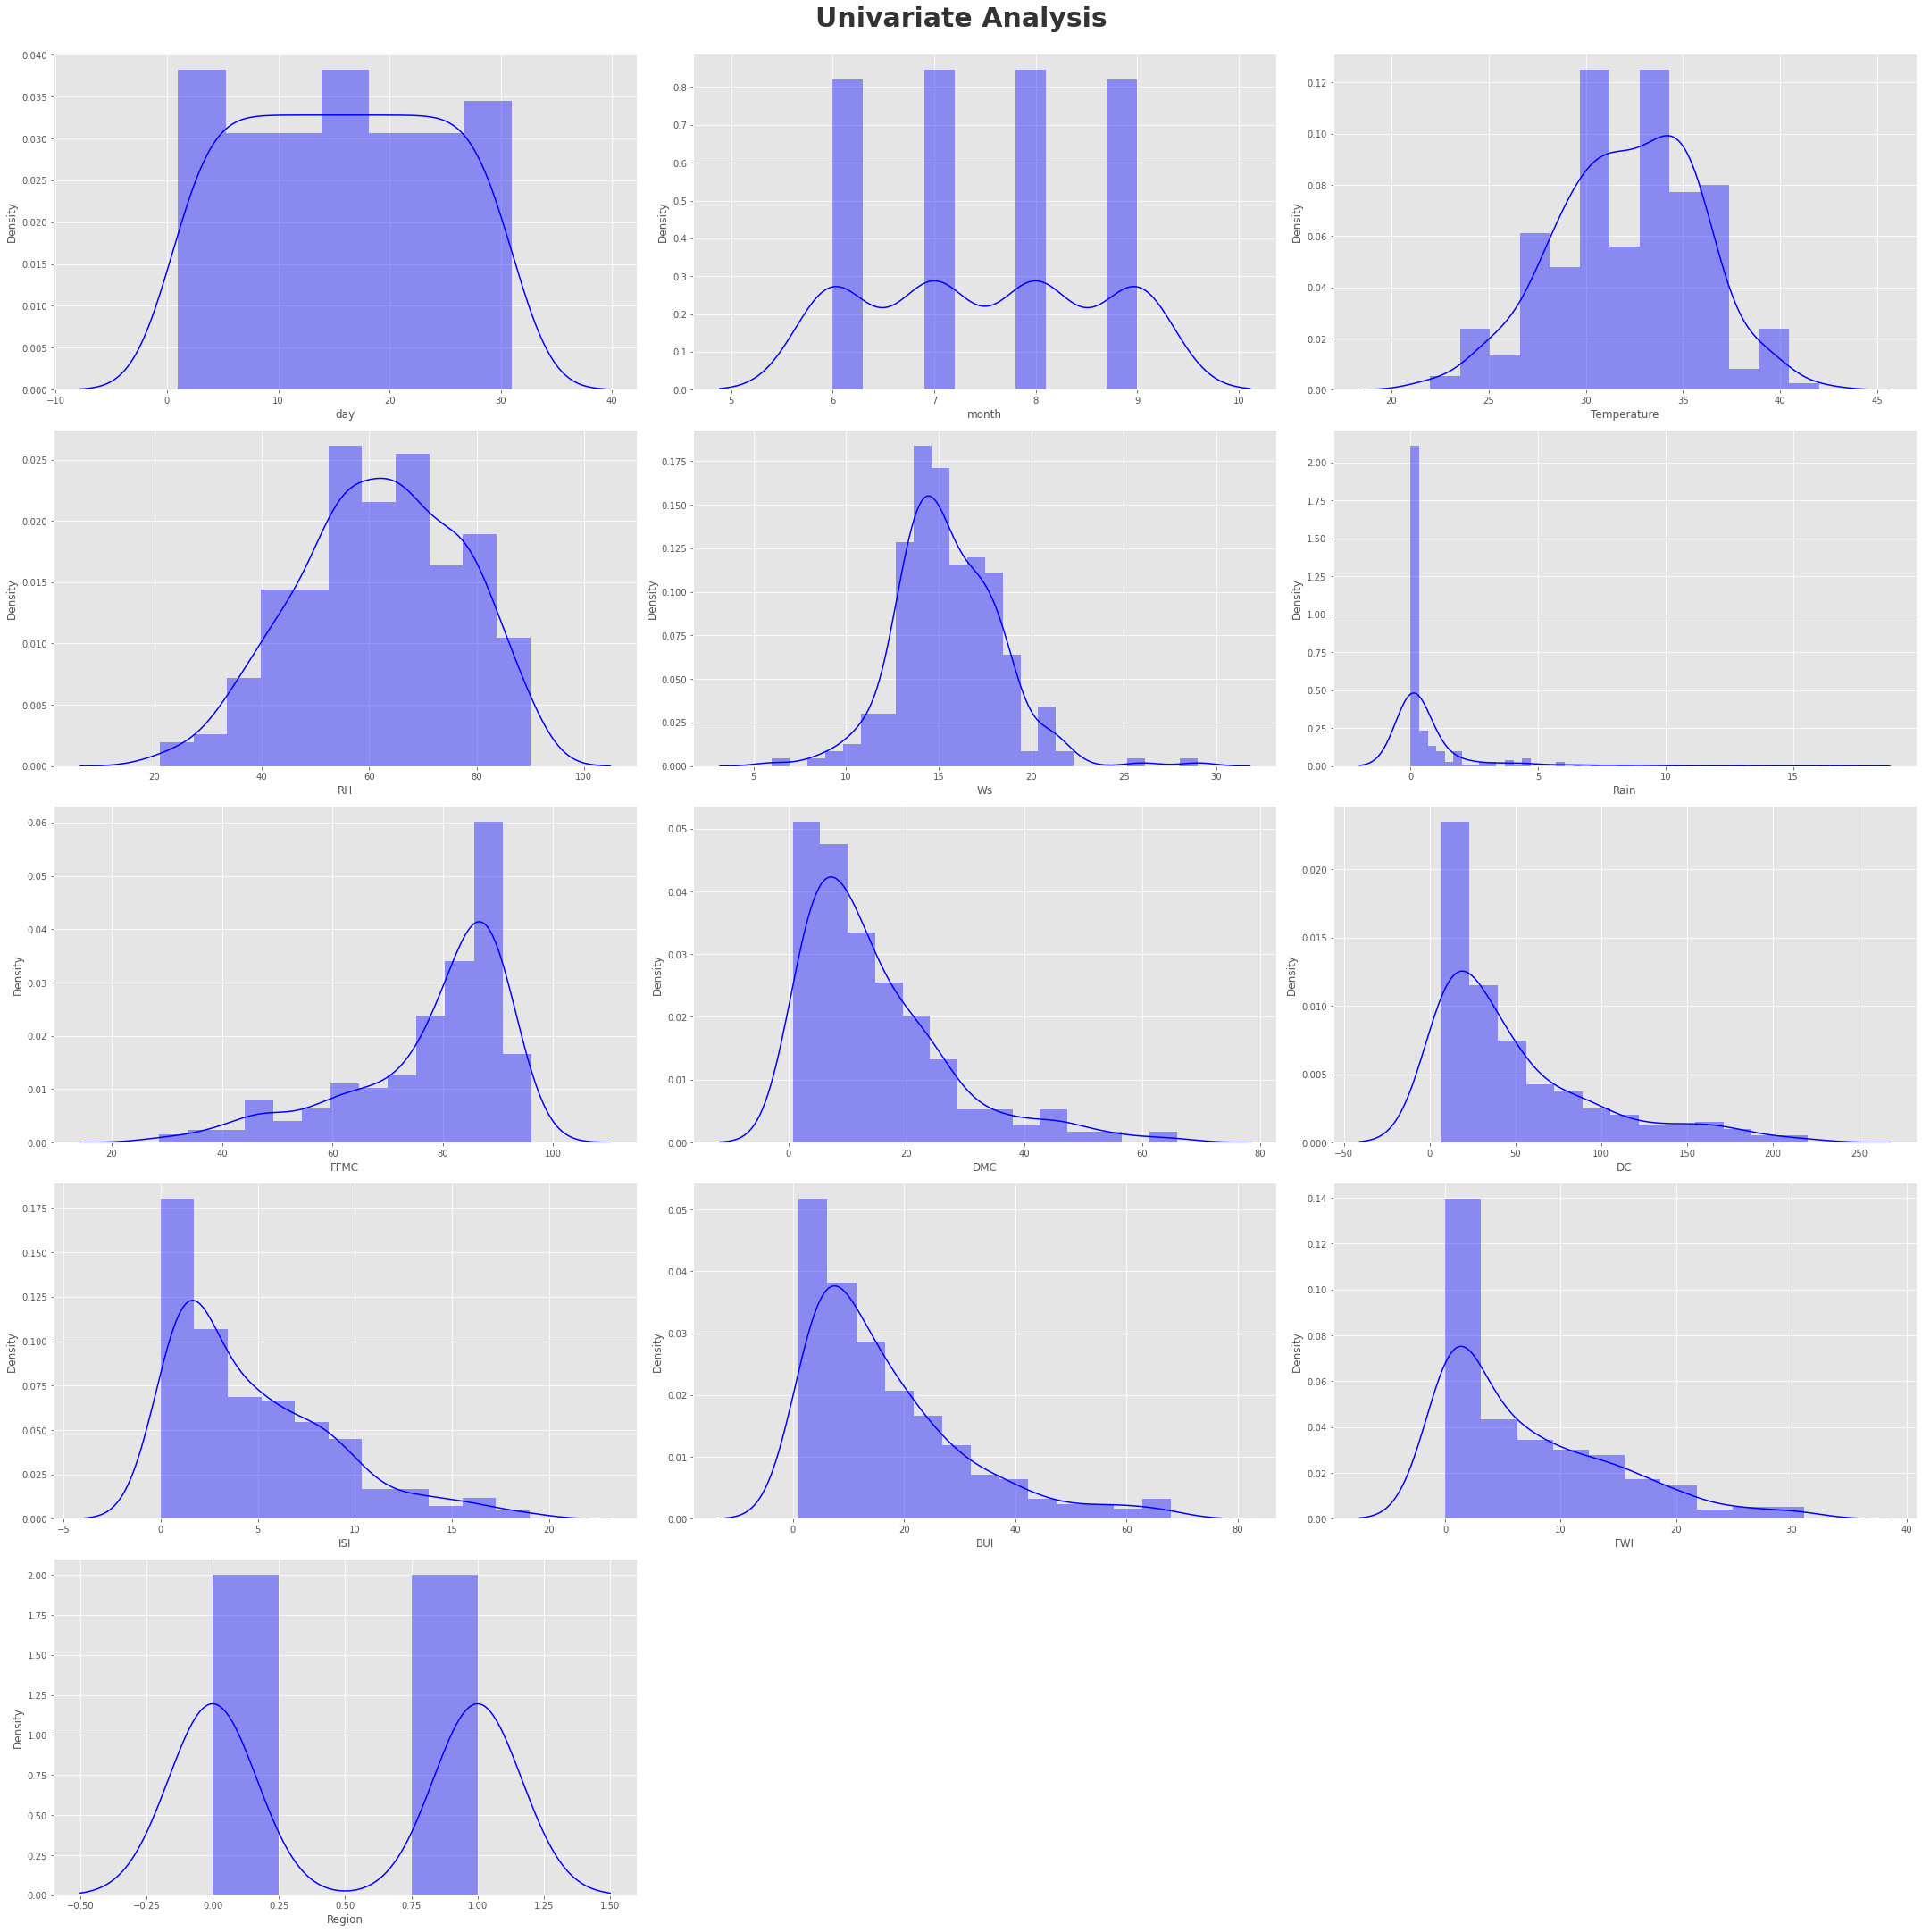

In [9]:
plt.figure(figsize=(30,30))
plt.style.use("ggplot")
plt.suptitle("Univariate Analysis", fontsize=30, fontweight = 'bold', alpha=0.8, y=1.)
for i in range(len(df2.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(df2[df2.columns[i]], color='b')
    plt.tight_layout()

In [30]:
pd.DataFrame(data=[df2.skew(),df2.kurtosis()],index=['skewness','kurtosis'])

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
skewness,0.002806,0.000000,-0.196309,-0.237964,0.545881,4.579071,-1.325633,1.527652,1.479042,1.12695,1.458466,1.143243,0.000000
kurtosis,-1.198650,-1.345988,-0.154310,-0.530328,2.602156,25.942123,1.055208,2.487598,1.614097,0.82986,1.979913,0.655316,-2.016598


High `skewness` and `kurtosis` is observed in `Rain` column.

<AxesSubplot:>

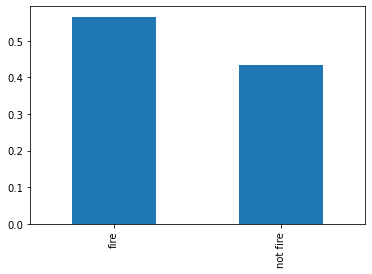

In [29]:
#Countplot for categorical columns
#sns.countplot(data=df1, y='Classes')
df1['Classes'].value_counts(normalize=True).plot.bar()

In [123]:
class_percent = df1['Classes'].value_counts(normalize=True)*100
class_percent

1    56.557377
0    43.442623
Name: Classes, dtype: float64

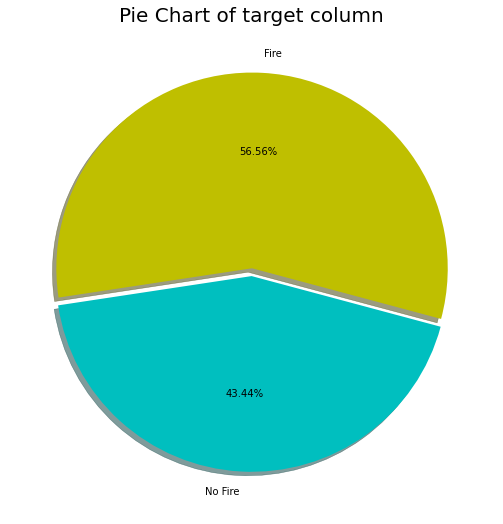

In [132]:
#PieChart
labels = ["Fire", "No Fire"]
explode = [0.02, 0.02]
colors = ['y','c']
plt.figure(figsize =(13, 9))
plt.pie(class_percent,labels = labels,autopct='%1.2f%%', startangle = -15, explode = explode, shadow = True, colors=colors)  
plt.title ("Pie Chart of target column", fontsize = 20)
plt.show() 

#### Categorical Features

<Figure size 432x288 with 0 Axes>

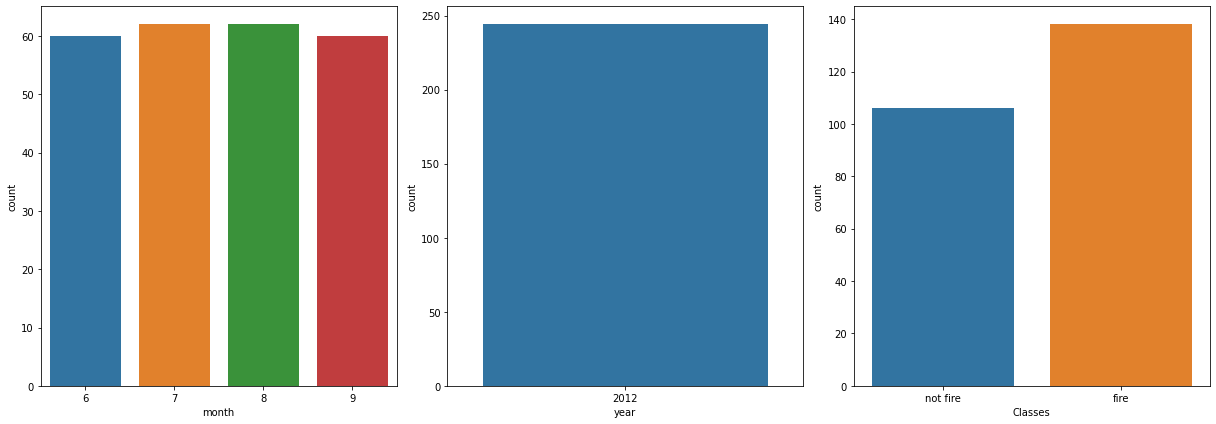

In [43]:
cat_cols = ['month','year','Classes']
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.figure(figsize=(17,6))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    sns.countplot(df1[cat_cols[i]])
    plt.tight_layout()

<AxesSubplot:>

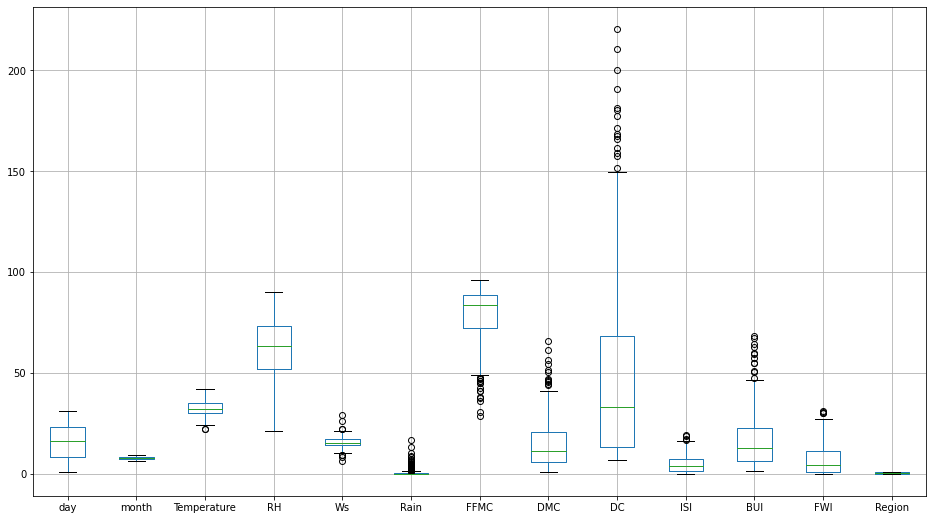

In [25]:
plt.figure(figsize=(16,9))

df2.boxplot()

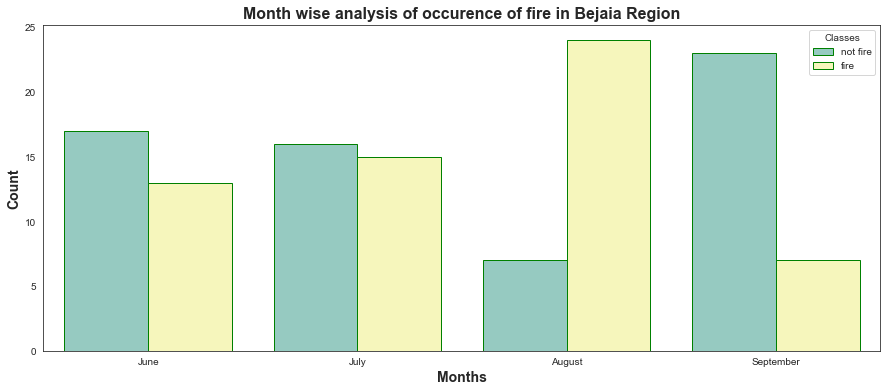

In [87]:
# Bejaia region
df_bej = df1.loc[df1['Region'] == 0]
plt.subplots(figsize = (15,6))
sns.set_style("white")
sns.countplot(x='month', hue='Classes', data=df_bej, ec='green', palette='Set3')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xlabel('Months', fontsize=14, weight='bold')
plt.xticks(np.arange(4), ['June','July','August','September'])
plt.title("Month wise analysis of occurence of fire in Bejaia Region", fontsize=16, weight='bold')
plt.show()

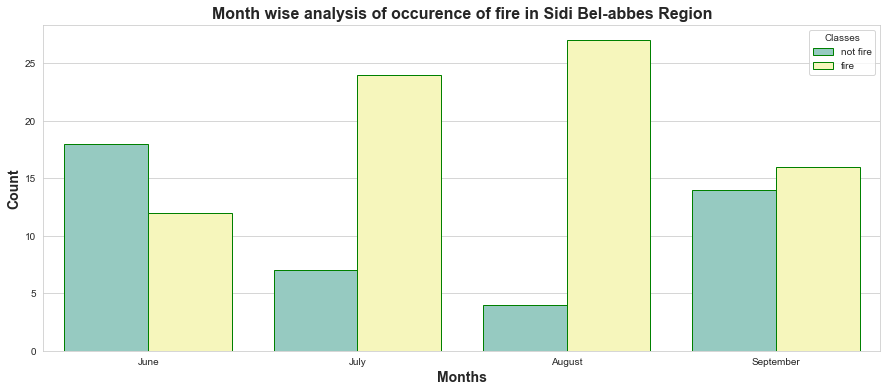

In [82]:
# Sidi Bel-abbes region
df_sidi = df1.loc[df1['Region'] == 1]
plt.subplots(figsize = (15,6))
sns.set_style("white")
sns.countplot(x='month', hue='Classes', data=df_sidi, ec='green', palette='Set3')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xlabel('Months', fontsize=14, weight='bold')
plt.xticks(np.arange(4), ['June','July','August','September'])
plt.title("Month wise analysis of occurence of fire in Sidi Bel-abbes Region", fontsize=16, weight='bold')
plt.show()

### Multivariate Analysis

In [7]:
df_corr = df1.drop(['day','month','year'], axis=1)

In [8]:
df_corr.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


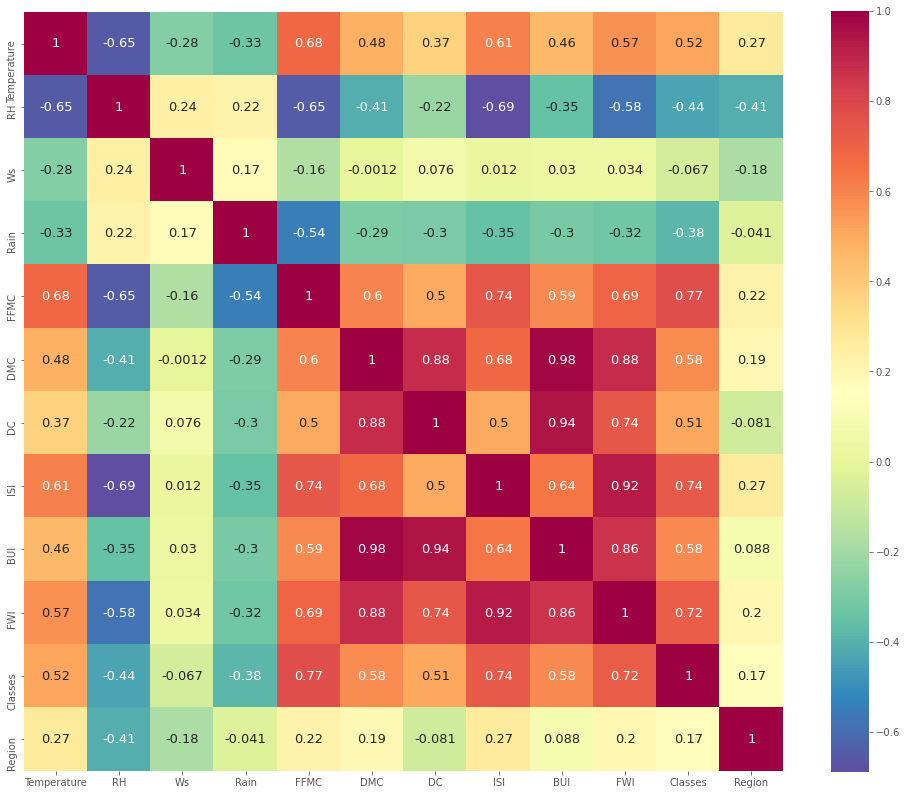

In [27]:
plt.figure(figsize=(17,14))
sns.heatmap(df_corr.corr(), annot=True, square=True, annot_kws={'size': 13}, xticklabels=df_corr.columns, yticklabels=df_corr.columns, cmap="Spectral_r")
#sns.set(font_scale=1)
plt.show()

DMC:BUI, DC:BUI, ISI:FWI and DMC:FWI have high correlation of 0.98, 0.94, 0.92 and 0.88 respectively.

### Pairplot

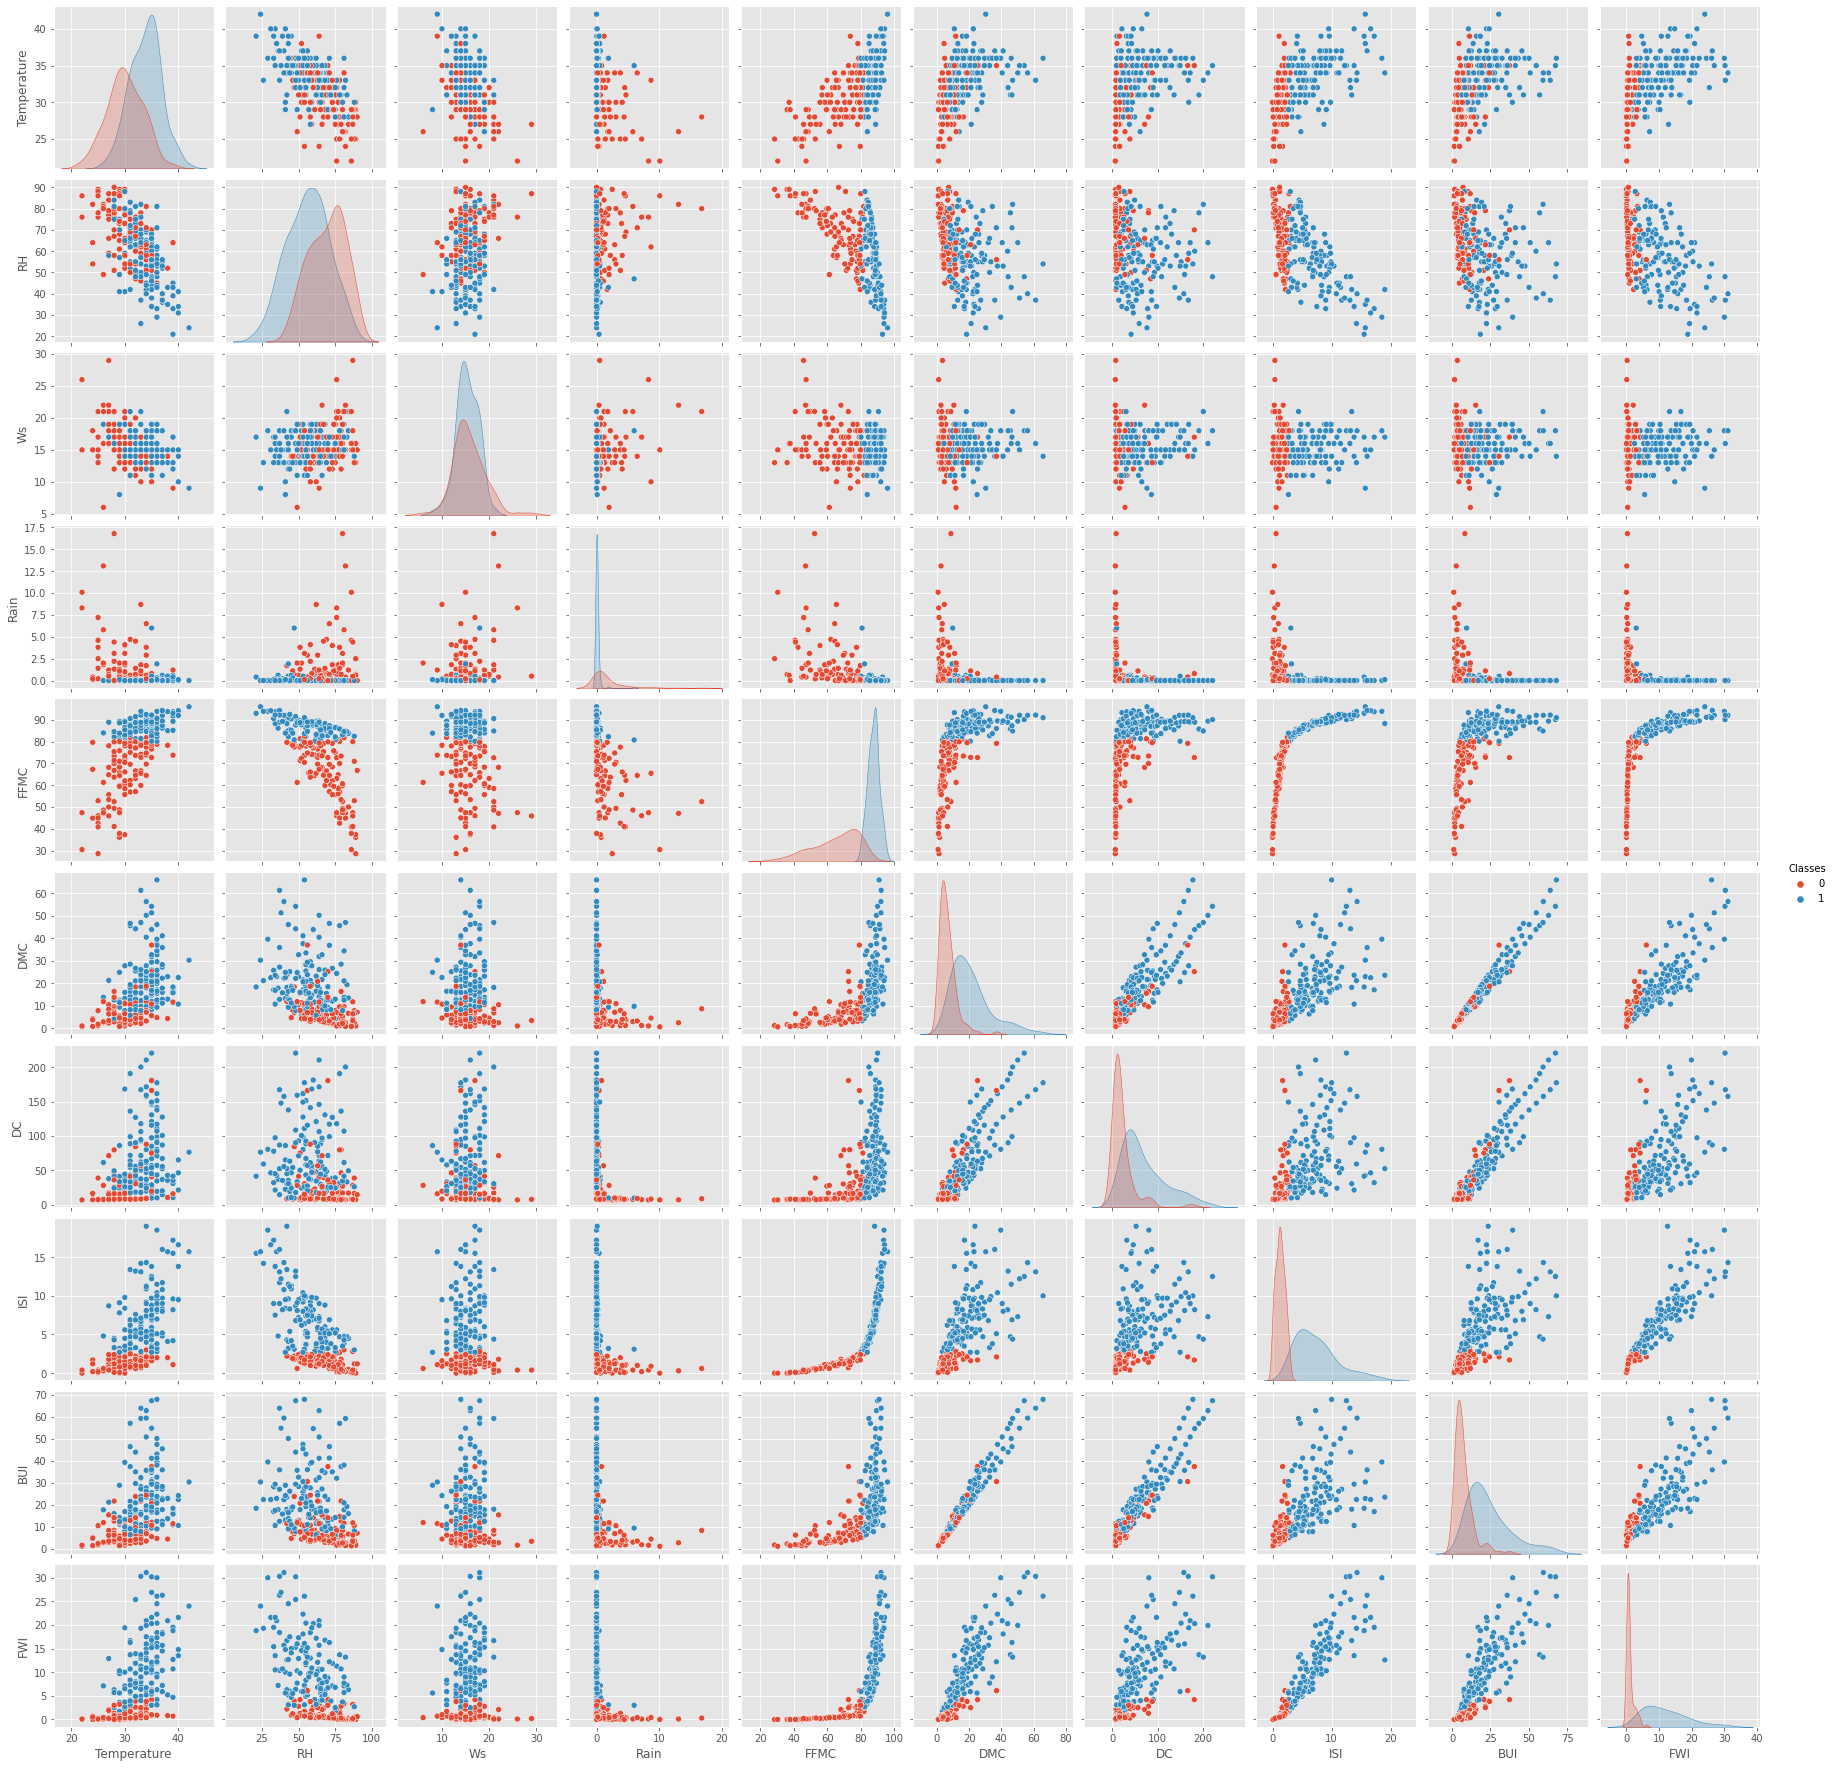

In [135]:
df_pp = df1.drop(['day','month','year','Region'], axis=1)
sns.pairplot(df_pp, hue='Classes')

### Scatterplot

We can create a scatterplot matrix, which allows us to visualize the relationship between each pairwise combination of variables in a dataset.

Scatter plots are used to determine relationships between two numerical variables. They can help see if there is a direct relationship (positive linear relationship or negative linear relationship for example) between two variables. Also, they can help us detect if our data has outliers or not.

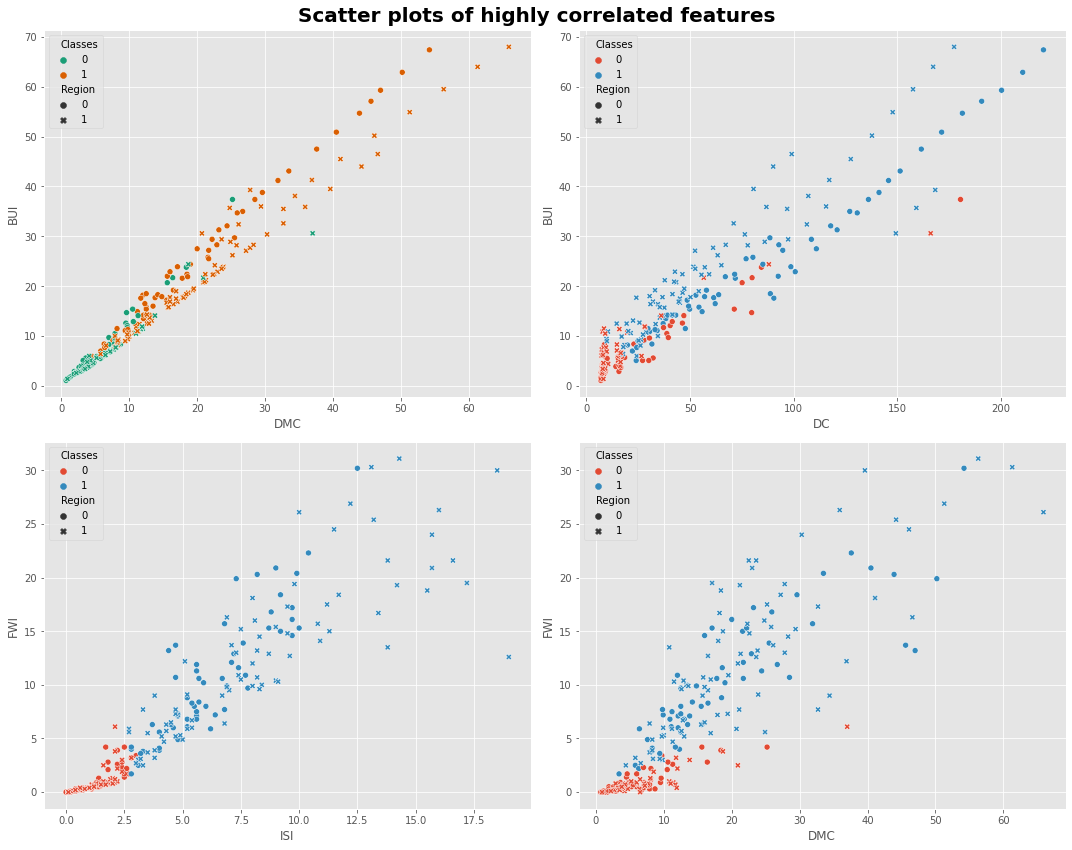

In [28]:
plt.figure(figsize=(15,12))
plt.suptitle("Scatter plots of highly correlated features", fontsize=20, fontweight = 'bold')
plt.subplot(2,2,1)
sns.scatterplot(data=df_corr, x='DMC', y='BUI', hue='Classes', style='Region', palette="Dark2")
plt.subplot(2,2,2)
sns.scatterplot(data=df_corr, x='DC', y='BUI', hue='Classes', style='Region')
plt.subplot(2,2,3)
sns.scatterplot(data=df_corr, x='ISI', y='FWI', hue='Classes', style='Region')
plt.subplot(2,2,4)
sns.scatterplot(data=df_corr, x='DMC', y='FWI', hue='Classes', style='Region')
plt.tight_layout()

### Catplot

<Figure size 864x432 with 0 Axes>

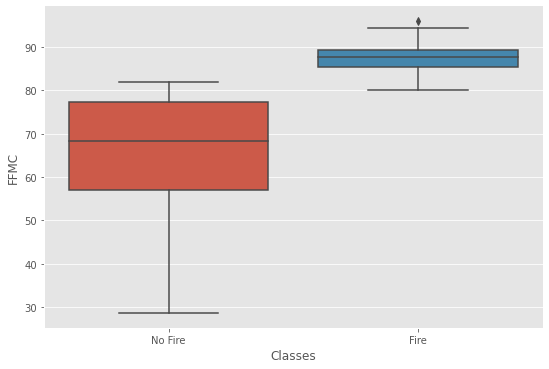

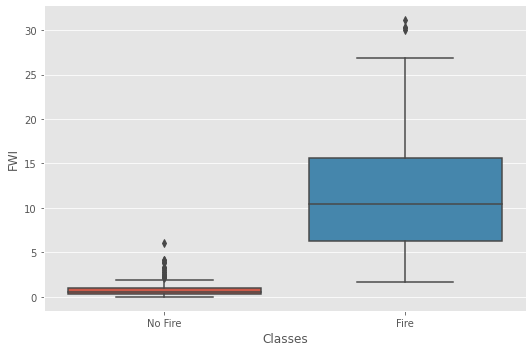

In [44]:
plt.figure(figsize=(12,6))
sns.catplot(x="Classes", y="FFMC", data=df_corr, kind="box", aspect=1.5)
plt.xticks(np.arange(2),['No Fire','Fire'])
sns.catplot(x="Classes", y="FWI", data=df_corr, kind="box", aspect=1.5)
plt.xticks(np.arange(2),['No Fire','Fire'])
plt.tight_layout()

### Variation with target class

Let's observe the relationship between independent variables and dependent variable.

In [ ]:
y = df_corr['Temperature']
X = df_corr.drop(columns = ['Temperature'])

In [ ]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Temperature',fontsize=20)
    plotnumber+=1
plt.tight_layout()

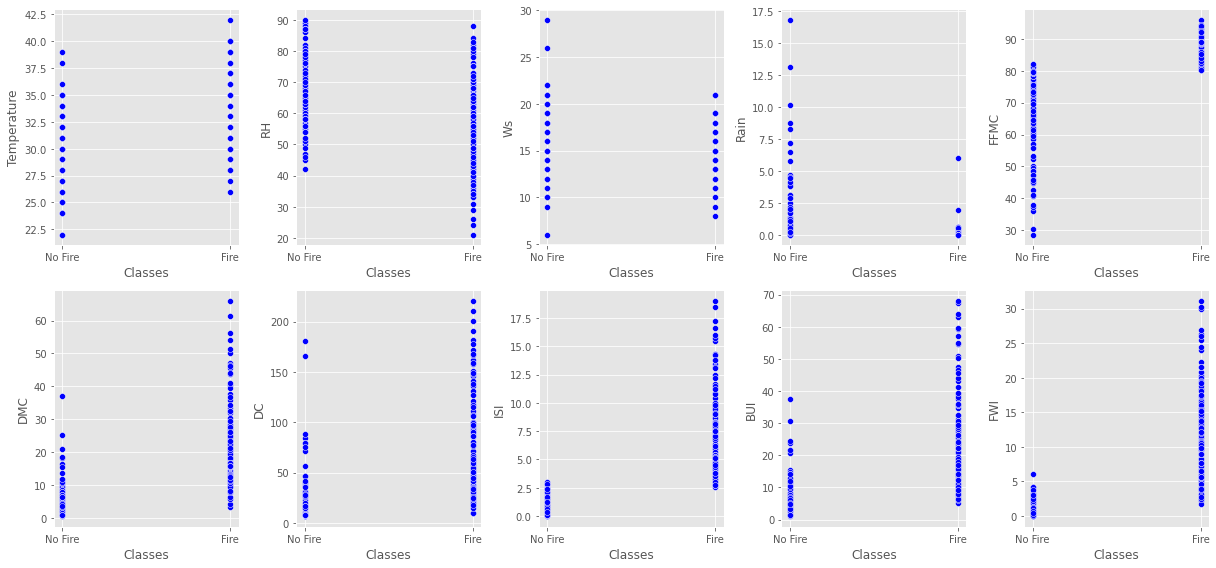

In [21]:
df_rq = ['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']
fig = plt.figure(figsize=(17, 8))

for i in range(0, len(df_rq)):
    ax = plt.subplot(2, 5, i+1)

    sns.scatterplot(data= df_corr ,x='Classes', y=df_rq[i], color='b')
    plt.xticks(np.arange(2),['No Fire','Fire'])
    plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

**Conclusions derived from scatter plot of various feature columns against target column**

- High values of `FFMC`(Fine Fuel Moisture) above 80 catch fire while rest doesn't.
- Very small values of `FWI` don't catch fire but majority does.
- For `RH`, `DMC`, `DC`, `ISI`, `BUI` and `FWI` features, most values result in a fire while for `FFMC` most values result in no fire. 
- Range of values in `Temperature` and `Ws` are equally distributed between fire and no fire.

In [24]:
df_corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [26]:
df_corr['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [96]:
tem = df_corr.groupby('Temperature')['Classes'].value_counts().to_frame().rename(columns={'Classes': 'Count'}).reset_index()
tem

,Temperature,Classes,Count
0,22,0,2
1,24,0,3
2,25,0,6
3,26,0,4
4,26,1,1
5,27,0,7
6,27,1,1
7,28,0,12
8,28,1,3
9,29,0,13


In [109]:
def barplot_no_fire(feature, xlabel):
    
    plt.figure(figsize=[14,8])
    df_grp = df_corr.groupby(feature)['Classes'].value_counts().to_frame().rename(columns={'Classes': 'Count'}).reset_index()
    ax = sns.barplot(x=feature, y="Count", data=df_grp[df_grp['Classes'] == 0], palette='Set2')
    ax.set(xlabel=xlabel, ylabel='No Fire Count')

In [117]:
def barplot_fire(feature, xlabel):
    plt.figure(figsize=[14,8])
    df_grp = df_corr.groupby(feature)['Classes'].value_counts().to_frame().rename(columns={'Classes': 'Count'}).reset_index()
    ax = sns.barplot(x=feature, y="Count", data=df_grp[df_grp['Classes'] == 1])
    ax.set(xlabel=xlabel, ylabel='Fire Count')

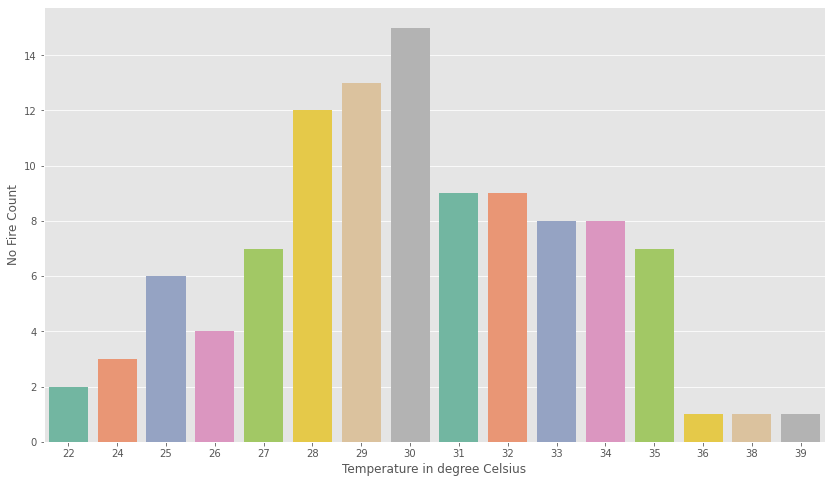

In [110]:
barplot_no_fire('Temperature','Temperature in degree Celsius')

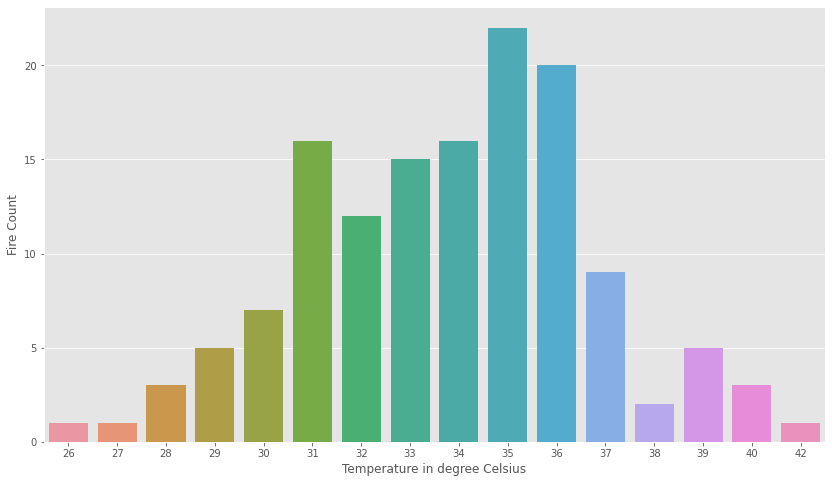

In [118]:
barplot_fire('Temperature', 'Temperature in degree Celsius')

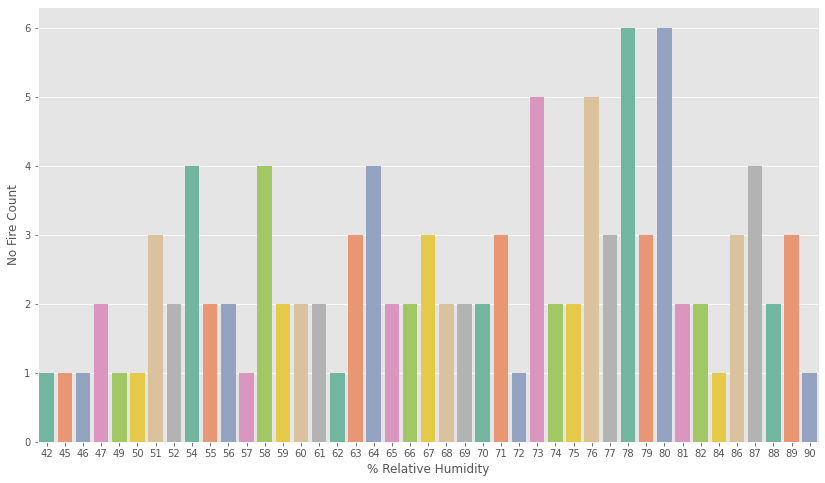

In [119]:
barplot_no_fire('RH','% Relative Humidity')

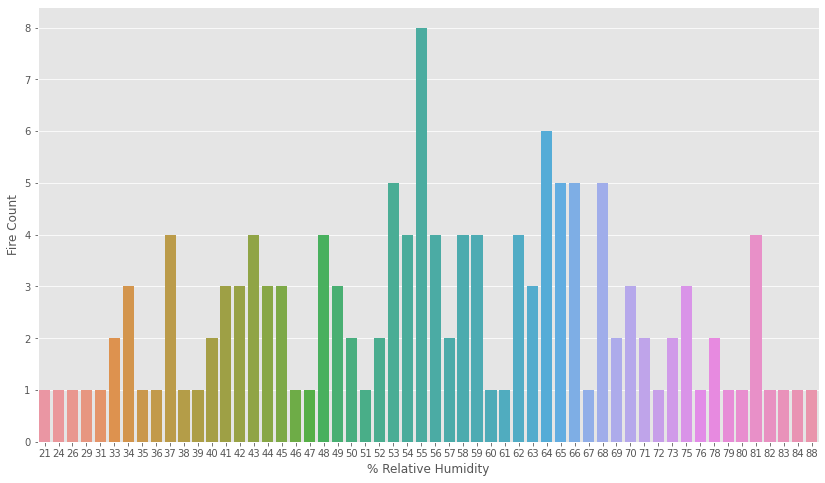

In [106]:
barplot_fire('RH','% Relative Humidity')

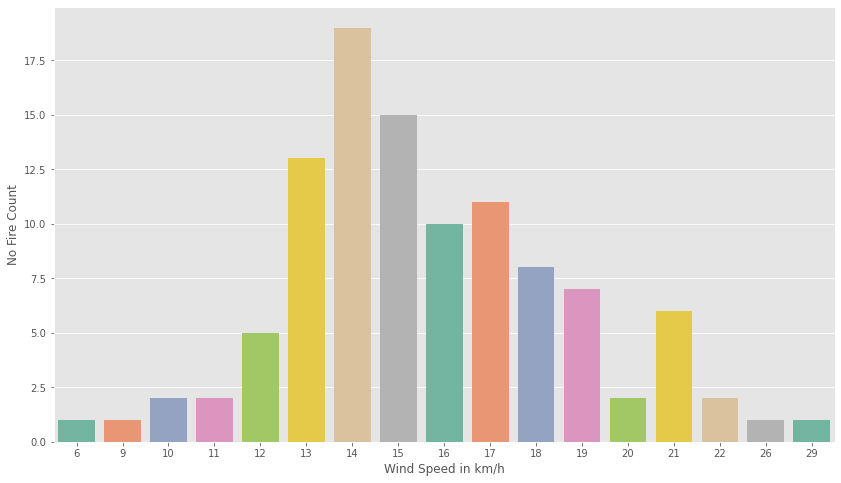

In [120]:
barplot_no_fire('Ws', 'Wind Speed in km/h')

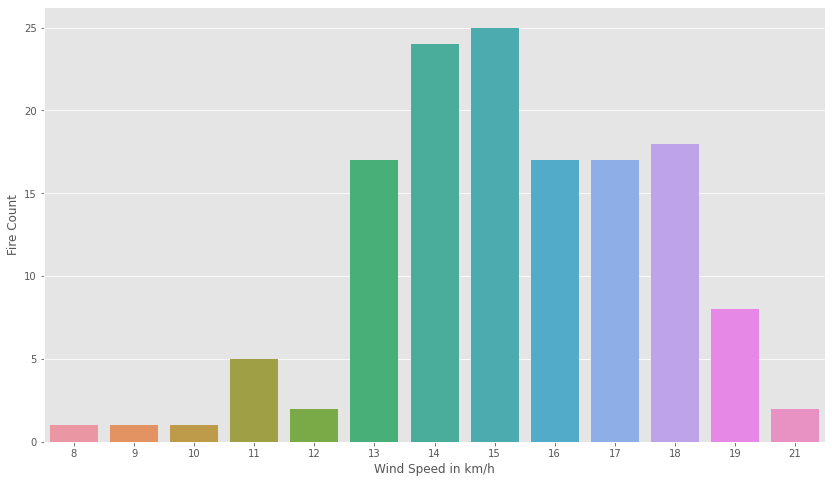

In [108]:
barplot_fire('Ws', 'Wind Speed in km/h')

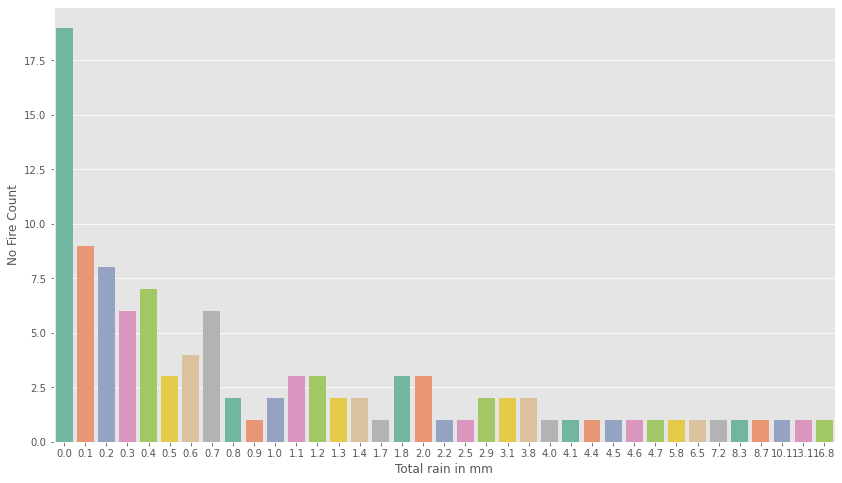

In [121]:
barplot_no_fire('Rain', 'Total rain in mm')

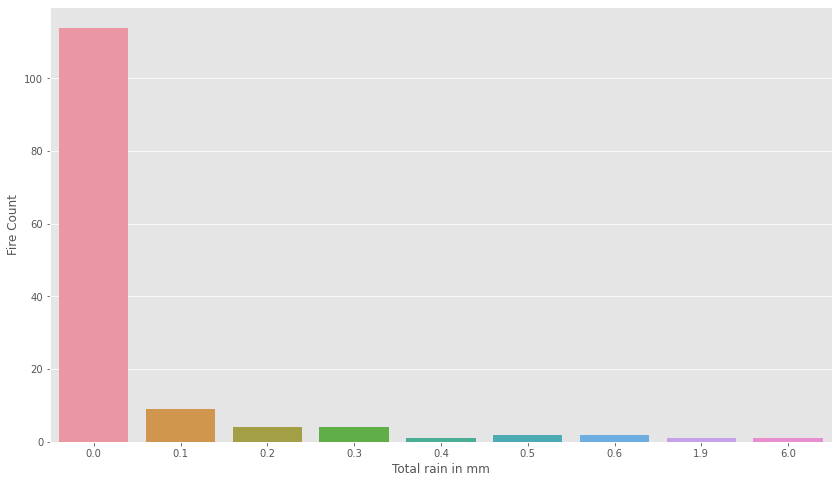

In [122]:
barplot_fire('Rain', 'Total rain in mm')

**TEMPERATURE**: Highest fire counts occur between temperature of 31-36 degree C while high no fire counts are found mostly in the range 28-30 degree C.

**RELATIVE HUMIDITY**: At relative humidty around 53-55 % and 64-66% there is more chances of fire whereas at humidities in range 73-80% the no fire count is high.

**WIND SPEED**: Highest fire count is found when the wind speed is around 13-18 km/h while the no fire count is also high in similar range of 13-15 km/h.

**RAIN**: Highest fire count is seen in cases of no to negligible rainfall while there is a small chance of no fire throughout the range from 0 to 16.8 mm

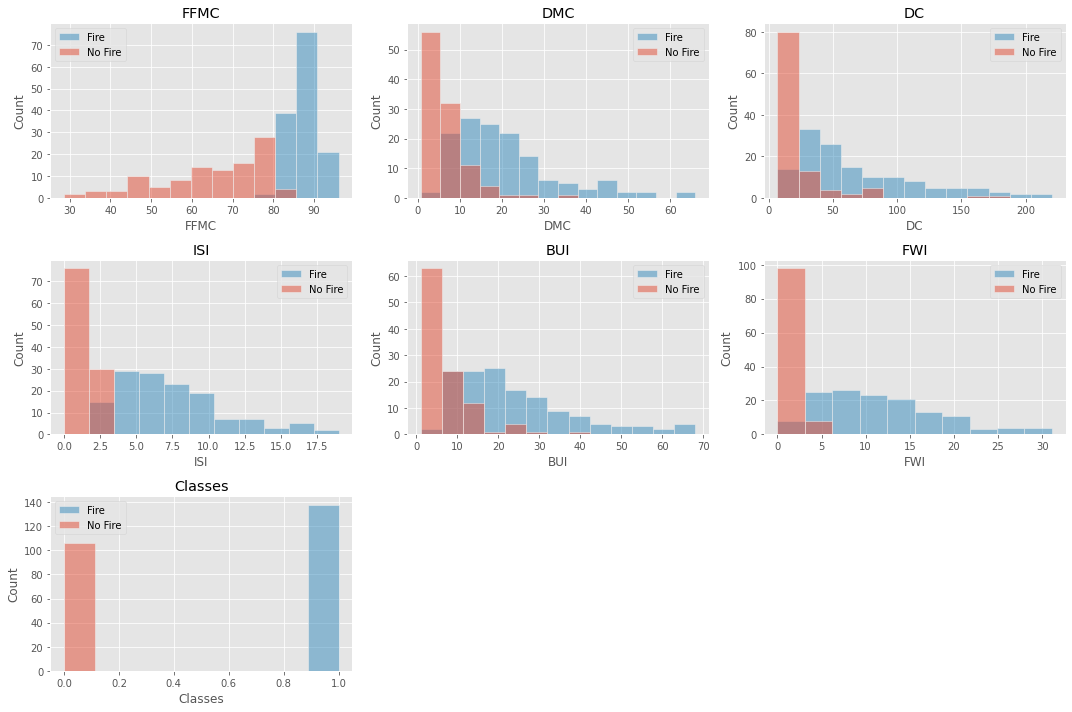

In [140]:
df_cus = df_corr.drop(['Temperature','RH','Ws','Rain','Region'], axis=1)

fig= plt.figure(figsize=(15,10))
#plt.suptitle('Histogram')

for i in range(len(df_cus.columns)):
    ax = plt.subplot(3,3,i+1)
    sns.histplot(data=df_cus, x=df_cus.columns[i], hue='Classes')
    plt.legend(labels = ['Fire','No Fire'])
    plt.title(df_cus.columns[i])
    plt.tight_layout()

- **Fine Fuel Moisture Code (FFMC)** index ranges from 28.6 to 92.5, where most the values are safe and do not cause forest fire but as values increase and go beyond 75-80 the chances of fire are high.

- **Duff Moisture Code (DMC)** index ranges from 1.1 to 65.9, we observe that in lower ranges i.e., from 1.1 to 20 shows greater likelihood of not catching fire while values from 10 onwards tend to catch fire more easily.

- **Drought Code (DC)** index lies in the range 7 to 220.4, where chances of not catching fire are at lower values i.e., below 50 while chances of fire spans almost the entire range.

- **Initial Spread Index (ISI)** index ranges from 0 to 18.5, where values below 3 are classified as no fire while the rest are unsafe.

- **Buildup Index (BUI)** index ranges from 1.1 to 68, where mostly the lower indexes (below 15) depict safe cases and there is a finite probability of catching fire at values above 5.

- **Fire Weather Index (FWI)** has a range from 0 to 31.1, where again majority of the safe cases lie in the lower indexes and there is likelihood of fire throughout the range from 2.5